## Term Project Milestone 1- Biswajit Sharma

### Predict Obesity risk based on eating habits and physical activity

#### Introduction

Obesity is a medical condition that is related to the excessive accumulation of body fat. It is not only a cosmetic concern but rather a medical problem that increases the risk of other health problems and diseases like heart diseases, diabetes, high cholesterol, high blood pressure, liver disease, musculoskeletal disorders, and certain cancers. Since 1997, WHO has considered obesity a global epidemic and a significant health problem. To prevent obesity, various organizations, including government and non-government, are promoting campaigns regarding two main risk factors: eating habits and physical activity (Gozukara et al., 2023).

Although it is known that excessive intake of calories can cause obesity, nutritional factors like low-quality diet, unbalanced diet, processed foods, and alcohol consumption can also increase the risk of obesity. Physical activity has also been very influential in controlling or preventing obesity.  The frequency, duration, and intensity of physical activity and exercises play an essential role in the effective prevention and reduction of obesity (Gozukara et al., 2023). Eating healthy and nutrituous food helps in managing proper body weight and preventing obesity. Therefore, it becomes important to invest resources in investigating the relationship of obesity with eating habits and physical activity. 

Healthcare plans can perform data mining and build a model to predict the early detection of obesity risk for their members which can yield huge benefits for both health plans and their members. Early detection of obesity risk helps individuals to be aware of the risk and take preventive measures so that they do not develop obesity related health conditions and diseases in the later stages of their life. It also helps health plans to intervene and incentivize members to motivate them in practicing obesity management such as healthy eating habits, exercises, and increase physical activity. This reduces the number of related health claims caused by obesity related diseases and essentially allows health plans to reduce the cost of care, including lesser premiums.

 This study will generate and evaluate a model to _predict obesity risk based on eating habits and physical activity_

#### Dataset

_[UC Irvine Machine Learning Repository - Obesity levels, Eating Having and Physical activity dataset.][1]_

This dataset include data about eating habits, physical activity, weight, height and obesity levels of individuals from the countries of mexico, Peru and Columbia. The data includes the eating habits and physical activity levels of 498 participants aged between 14 and 61 years (UCI. 2019).

The originally collected data was preprocessed, such as the removal of missing values, and normalization was performed. It was also balanced to reduce the skewness of the obesity levels. 23% of the source data is actual responses collected over a 30-day survey, while the remaining 77% was synthetically generated using SMOTE (Palechor & de la Hoz Manotas, 2019).

There are 17 variables in the dataset.

 - Gender
 - Age
 - Height
 - Weight
 - Family History of overweight
 - Frequency of consumption of high caloric food (FAVC)
 - Frequency of consumption of vegetables (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Daily consumption of water (CH20)
 - Consumption of alcohol (CALC)
 - Calorie consumption monitoring done (SCC)
 - Frequency of Physical activity (FAF)
 - Hours of use of electronic devices (TUE)
 - Mode of transportation used (MTRANS)
 - Obesity Level

Obesity level is labelled in the source data with classes as given below.

 - Underweight 
 - Normal
 - Overweight
 - Obesity I
 - Obesity II
 - Obesity III

[1]: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Analysis

In [1]:
# import required modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataset into pandas dataframe
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
# view few rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#convert all column names to lower case for consistent case
col_names = {cols: cols.lower()
 for cols in df.columns
}

df = df.rename(columns=col_names)

In [5]:
# view few rows
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# define numerical, categorical features and target

numerical_features = ["age", "fcvc", "ncp", "ch2o","faf", "tue","height","weight"]
categorical_features = ["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans"]
target = "nobeyesdad"

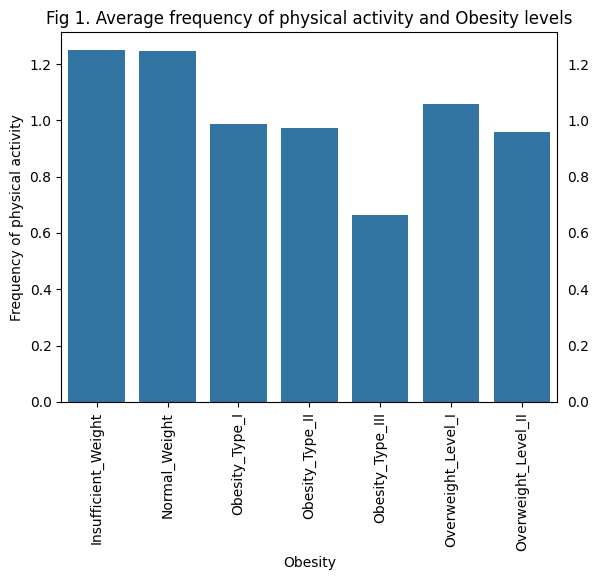

In [20]:
#get average frequency of physical activity for each obesity levels 
grouped = df[["nobeyesdad","faf"]].groupby("nobeyesdad").mean()

# plot to view frequency of physical activity relationship with obesity levels 
sns.barplot(data=grouped, x="nobeyesdad", y="faf")
plt.tick_params(labelright=True)
plt.title("Fig 1. Average frequency of physical activity and Obesity levels")
plt.ylabel("Frequency of physical activity")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 1 shows that the average frequency of physical activity among obese and overweight people is lower than those who are normal weight or underweight. This may indicate the presence of a relationship between obesity and the frequency of physical activity.

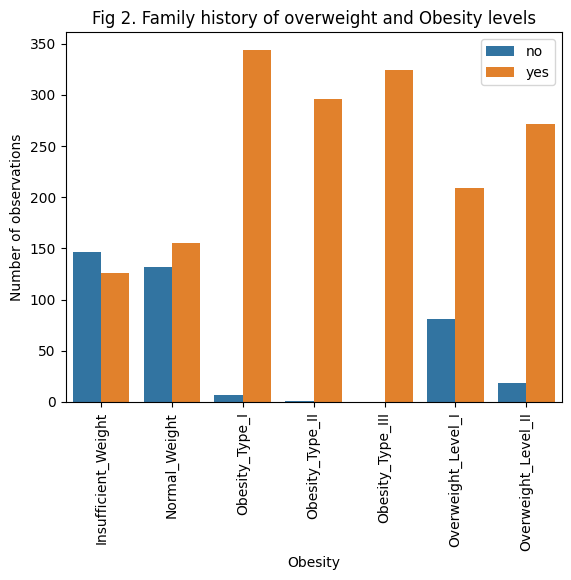

In [21]:
 #get counts of observations for each obesity levels grouped based on whether having a family history of overweight
grouped = df.groupby(["nobeyesdad","family_history_with_overweight"]).count()["age"].reset_index()

# plot to view family history of overweight relationship with obesity levels
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="family_history_with_overweight")
plt.title("Fig 2. Family history of overweight and Obesity levels")
plt.ylabel("Number of observations")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

Fig 2 shows that obese and overweight people generally have a family history of overweight. This indicates that family history may play a vital role in increasing the risk of obesity, which may be due to genetic factors.

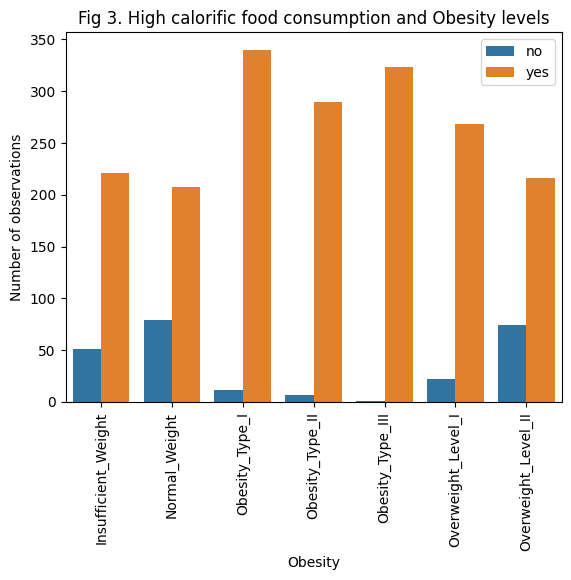

In [18]:
#get counts of observations in each obesity levels based consumption of calorific foods
grouped = df.groupby(["nobeyesdad","favc"]).count()["age"].reset_index() 

# create plot to visualize high calorific food consumption with various obesity levels
sns.barplot(data=grouped, x="nobeyesdad", y="age", hue="favc")
plt.title("Fig 3. High calorific food consumption and Obesity levels")
plt.ylabel("Number of observations")
plt.xlabel("Obesity")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()

Fig 3 shows that the number of people with obesity group who consume high calorific foods is much higher than those who do not consume high claorific foods. This indicates a potential presence of a relationship between obesity and frequent consumption of high calorific foods.

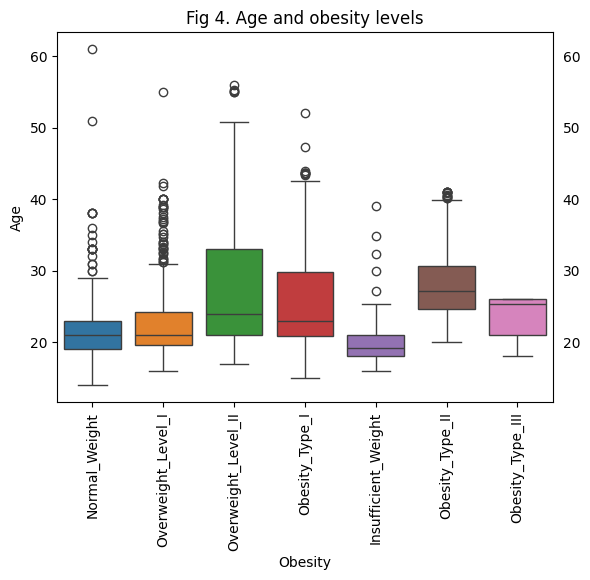

In [16]:
# plot to view relationship of age with obesity levels
sns.boxplot(x=df["nobeyesdad"], y=df["age"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 4. Age and obesity levels")
plt.ylabel("Age")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

Fig 4 shows that age may also be important in increasing the obesity risk. The boxplots show that the median age of obese and overweight people is higher than that of those who are underweight or normal weight. It appears that as people become older, their risk of obesity also increases.

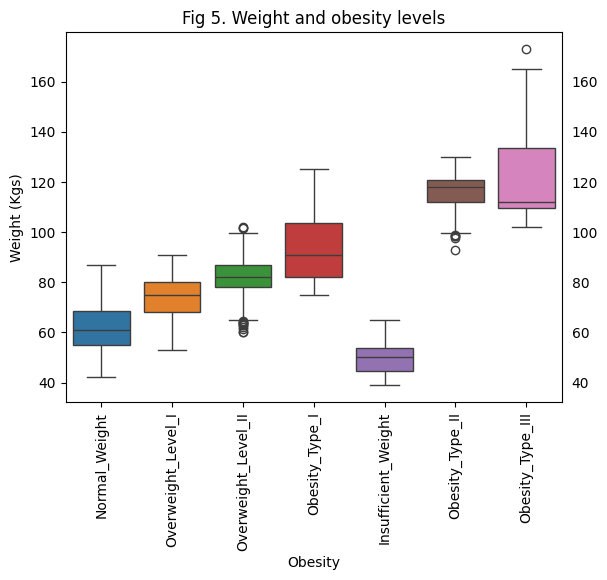

In [17]:
# plot to view relationship of weight with obesity levels
sns.boxplot(x=df["nobeyesdad"], y=df["weight"], hue=df["nobeyesdad"])
plt.tick_params(labelright=True)
plt.title("Fig 5. Weight and obesity levels")
plt.ylabel("Weight (Kgs)")
plt.xlabel("Obesity")
plt.xticks(rotation=90)
plt.show()

We already know that weight is one of the most important factors that contribute to obesity. Fig 5 also aligns with this understanding and shows that people with obesity have much higher weight than those are with normal weight. We see that the median weight for type II and type III obesity levels are much higher than that of normal weight and overweight.

#### Summary

From the above plots (Fig 1 through Fig 5), we observe that there is a relationship between eating habits, physical activity and obesity. We noticed that people with obesity generally frequently consume high calorific foods and perform lower physical activity than compared to normal weight people. Family history may also play a vital role in increasing the risk of obesity because we see that the obesity is more prevalent among the individuals with a family history of overweight. We also observed that obese and overweight people are generally older, and therefore, obesity risk age may increase with age. 

#### References

Defining Adult Overweight & Obesity. (n.d.). Centers for Disease Control and Prevention.
https://www.cdc.gov/obesity/basics/adult-defining.html

Estimation of obesity levels based on eating habits and physical condition. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

Gozukara Bag, H.G., Yagin, F.H., Gormez, Y., González, P.P., Colak, C., Gülü, M., Badicu, G., Ardigò, L.P. 2023. Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics. 13(18), 2949. https://doi.org/10.3390/diagnostics13182949

Palechor, F.M., de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data Brief. 25, 104344. https://doi.org/10.1016/j.dib.2019.104344